<h1> Import data </h1>

In [5]:
import pandas as pd
import numpy as np
datafile = "train_V2.csv"
df = pd.read_csv(datafile)

In [2]:
df.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4446966 entries, 7f96b2f878858a to 0d8e7ed728b6fd
Data columns (total 28 columns):
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(3)
memory usage: 983.9+ MB


<h1>Drop all the missing values</h1>
<li>In this file, there is no missing value

In [21]:
#drop all the missing values,  in this file, there is no missing value
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745155 entries, 1 to 4446965
Data columns (total 30 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
Total Distance     float64
dtypes: float64(7), int64(19), object(4)
memory usage: 649.3+ MB


In [22]:
# rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
# Clean the data that rankPoints = -1, since it means none in this file
df = df[df['rankPoints'] !=-1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745155 entries, 1 to 4446965
Data columns (total 30 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
Total Distance     float64
dtypes: float64(7), int64(19), object(4)
memory usage: 649.3+ MB


In [7]:
# check how many data delete from rankPoint = -1
#14446965 original rows
# 2745155 : rows remained after clean the rankPoint = -1
deletdata = (4446965- 2745155)/4446965
deletdata
# not a big potion and still have a bigdata set, good to go

0.3826902168107912

<h1>Identify the cheater</h1> 
<li>Aim Hacks
<ol>
<li>They will take control of a players aim and automatically target it towards opponents. 
</ol>

<li>Speed Hacks
<ol>
<li>They usually give the player a massive speed increase, meaning they can go from one side of the map to the other in seconds. （Idea: First find out the total distance and game duration, to caculate the average speed --> if the speed is 3 times higher than the toal average speed, then identify the cheaters. --> Hard to check, since player may not run but swim or drive,can not get an effective velocity 
<li>Distance: not straight foward since the game duration is different）
</ol>

<li>Recoil Hacks
<ol>
<li>automatically manage the recoil. This means all they have to do is press the fire button and don’t have to adjust their mouse to account for the recoil, as the script will do it all for them and every shot will go exactly where they want it to.(all kills are headshotXXX) （远距离伤人）
</ol>

<li>Wall Hacks
<ol>
<li>Wall hacks basically allow cheaters to see other players through walls, or add extra UI elements to reveal a players location. (kill 100 people without moving)
</ol>
Abnormal Weapons Hackers：aquaring 100 weapons without moving

<h1>Aim Hacks</h1> 

They will take control of a players aim and automatically target it towards opponents. First look through the density of kills, then decided the outlier to identify the cheaters. 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns


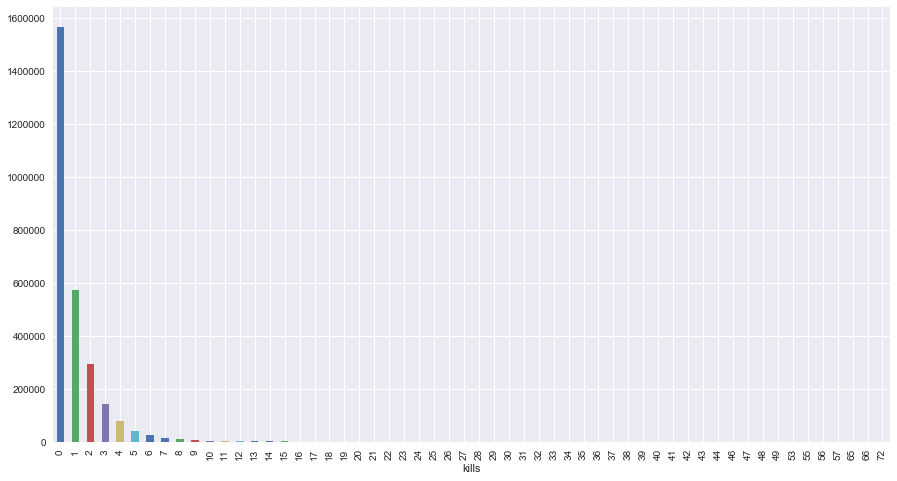

In [9]:
kills = df.groupby('kills')
kills.size().plot(kind='bar', figsize=(15,8))


In [10]:
max(df['kills'])
# most people have kills between 0 - 15, but the max number is 72 which is very far away from the general group. 
#So decided to identify players with 40 kills to be the cheater

72

In [11]:
df[df['kills'] > 40] #22 players have over 40 kills

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,0,...,0,0.0,0,0.0,0,0,23.71,61,0,0.7000
810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,0,...,0,0.0,0,0.0,0,0,1036.00,60,0,1.0000
da31f191ace8ed,ce9a3c4950a8f2,17dea22cefe62a,10,0,5793.0,0,5,2,1,0,...,0,0.0,0,0.0,0,0,24.27,56,0,1.0000
2ade4369bccd12,9f9e64a3db8384,e024bf51bf1799,12,0,5557.0,0,7,4,1,0,...,0,0.0,0,0.0,0,0,85.55,66,0,1.0000
80ac0bbf58bfaf,1e54ab4540a337,08e4c9e6c033e2,5,0,6375.0,0,21,4,1,0,...,0,0.0,0,0.0,0,0,1740.00,23,0,1.0000
f241fdbb4f94c6,fadbbc4cbb3e06,e024bf51bf1799,9,0,3707.0,0,5,1,5,0,...,0,0.0,0,0.0,0,0,46.71,72,0,0.7778
be4ff9afaa5bb1,abb73dd57619fa,f900de1ec39fa5,22,0,5377.0,0,8,4,3,0,...,0,954.4,0,0.0,0,0,1128.00,83,0,0.8000
1f6ceaa5140fb6,dc2fef63e14d5c,f900de1ec39fa5,15,0,5468.0,0,13,5,2,0,...,0,3492.0,0,0.0,0,0,1059.00,60,0,0.9000
22219eee457455,8e7fc0a8043552,e024bf51bf1799,9,0,4376.0,0,11,5,4,0,...,0,0.0,0,0.0,0,0,225.40,63,0,0.8333


/Users/wangzheng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


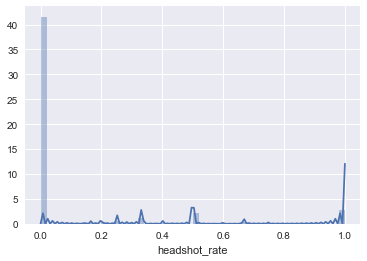

In [12]:
df['headshot_rate'] = df['headshotKills']/df['kills']
# headshot_rate = df.groupby('headshot_rate')
df['headshot_rate'] = df['headshot_rate'].fillna(0)
sns.distplot(df['headshot_rate'] , bins=50)

# the density function did not vary a lot between [0,1], so do not consider the high headshot rate as cheater

<h1>Speed Hacks</h1>

They usually give the player a massive speed increase, meaning they can go from one side of the map to the other in seconds. 

Idea: 
<li>First find out the total distance and game duration, to caculate the average speed --> if the speed is 3 times higher than the toal average speed, then identify the cheaters. --> Hard to check, since player may not run but swim or drive,can not get an effective velocity 
<li>Distance: not straight foward since the game duration is different

<h1>Recoil Hacks</h1> 
Automatically manage the recoil. This means all they have to do is press the fire button and don’t have to adjust their mouse to account for the recoil, as the script will do it all for them and every shot will go exactly where they want it to.
<li> Let's assume the 1km snip shot is a cheater based on the general data

/Users/wangzheng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


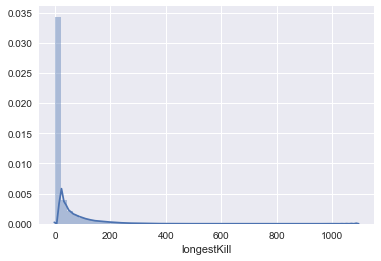

In [16]:
# longestkill = df.groupby('longestKill')
# longestkill.size().plot(kind='bar', figsize=(15,8))
sns.distplot(df['longestKill'] , bins=50)

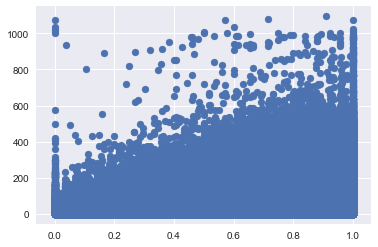

In [180]:
plt.scatter(x="winPlacePerc",y="longestKill",data=df)
# Most people with high longestKill with have a high Percenge of the winning. It is true since the longest kills can show the skills, but also this will be a good factor to detect cheaters. 

In [17]:
df[df['longestKill'] >=1000]

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshot_rate
Id,,,,,,,,,,,,,,,,,,,,,
88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,0,...,723.20,0,0.00,0,1,3052.00,9,0,0.9231,0.250000
ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,0,...,1717.00,0,0.00,0,0,1264.00,26,0,1.0000,0.000000
1ff9763ca30279,7fb3a83ebb050d,838cb9a3c94598,0,0,151.2,0,0,0,45,0,...,0.00,0,0.00,0,0,0.00,3,0,0.7143,0.000000
4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,0,...,2085.00,0,0.00,0,0,1074.00,22,0,0.0000,0.000000
1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,0,...,0.00,0,0.00,0,0,569.50,18,0,0.9091,0.500000
f4082eee4c45e9,4d02ce950f74fc,838cb9a3c94598,1,0,916.4,0,0,0,17,0,...,0.00,0,0.00,4,0,0.00,15,0,1.0000,0.000000
91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,0,...,0.00,0,0.00,0,0,235.30,41,0,0.5000,0.173913
5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,0,...,0.00,0,0.00,0,0,133.20,43,0,0.6000,0.545455
42df3102cb540b,7d9b2be15b355b,610d78f3affd2e,5,0,2500.0,0,7,1,2,0,...,0.00,0,0.00,2,0,464.50,52,0,0.0000,0.318182


<h1>Wall Hacks</h1>
Wall hacks basically allow cheaters to see other players through walls, or add extra UI elements to reveal a players location. 
<li> High Headshot rate without moving long

In [37]:
# Get the Total Distance the player has moved in one game
df['Total Distance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
# sns.distplot(df['Total Distance'] , bins=50)


/Users/wangzheng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count    2.745155e+06
mean     1.290464e+02
std      1.697947e+02
min      0.000000e+00
25%      0.000000e+00
50%      8.222000e+01
75%      1.840000e+02
max      6.616000e+03
Name: damageDealt, dtype: float64

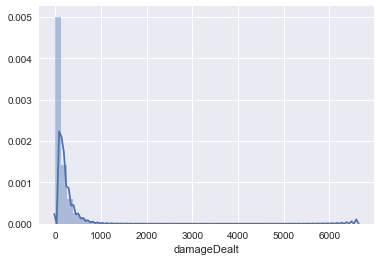

In [19]:
# Look through the General numbers of the damageDealt
sns.distplot(df['damageDealt'] , bins=50)
df['damageDealt'].describe()

In [169]:
# The 10% least moving distance -- 0.1 percentile of moving distance
move_low_bound = df['Total Distance'].quantile(0.1)
move_low_bound

42.4

In [170]:
# The 10% most damage Dealt amount -- 0.9 percentile of weapons acquired
damage_upp_bound = df['damageDealt'].quantile(0.9)
damage_upp_bound

331.6

In [173]:
df[(df['damageDealt'] >= damage_upp_bound) & (df['Total Distance'] <= move_low_bound)]
# from the data, we can see that there 1291 player who almost did not move at all but get the almost highest damages, it is reasonable to assume they are the cheaters

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,Total Distance,weapon_group,moving_group
1357,72f70c6c074ca9,da042db555b932,f3c5fa51aacb95,0,0,722.8,0,0,0,5,...,0.0,0,0,0.000,15,0,0.0000,0.000,<=100.00%,<=10.00%
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.000,8,0,0.8571,0.000,<=100.00%,<=10.00%
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.000,22,0,0.6000,0.000,<=100.00%,<=10.00%
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.000,13,0,0.8947,0.000,<=100.00%,<=10.00%
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.1,4,1,3,7,...,0.0,0,0,0.000,8,0,0.8000,0.000,<=100.00%,<=10.00%
21842,ddd3f3db2e40af,7d9811ed89d03a,2ab8ef7955d1d9,1,0,342.9,2,1,0,11,...,0.0,0,0,27.610,1,0,0.1556,27.610,<=10.00%,<=10.00%
23115,74796cbac60cb0,a17261ab261e78,7a243846f0271a,0,3,348.3,0,0,0,4,...,0.0,0,0,0.000,10,0,1.0000,0.000,<=100.00%,<=10.00%
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.0,0,4,1,7,...,0.0,0,0,0.000,8,0,0.6000,0.000,<=100.00%,<=10.00%
24110,7d5c3aabe63572,a00b3073d12086,237585cba79025,0,0,494.8,0,1,0,6,...,0.0,0,0,18.850,1,0,0.1099,18.850,<=10.00%,<=10.00%
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.9,0,2,11,12,...,0.0,0,0,0.000,8,0,0.8571,0.000,<=100.00%,<=10.00%


<h1>Abnormal weapon acquisition

In this part, we try to figure out cheaters considering weapons acquired and distance covered at the same time. First we plot the bar graph in which each cluster of bars represents total number of players fall into certain interval of percentiles of moving distance. And in every cluster of bars, there are also group of numbers of players grouped by weapons acquired. Second, we try to delete the data in which, the players move less than 90% of all players but acquire more weapons than 90% of all players.

In [43]:
# The 10% least moving distance -- 0.1 percentile of moving distance
move_low_bound = df['Total Distance'].quantile(0.1)
# The 10% most weapons acquiring amount -- 0.9 percentile of weapons acquired
weapon_upp_bound = df['weaponsAcquired'].quantile(0.9)
weapon_upp_bound

7.0

In [166]:
# Computing the percentiles of column weaponAcquired
level = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
percentile_weapon = list(map((lambda y: df["weaponsAcquired"].quantile(y)), level))
percentile_weapon


[1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, 5.0, 7.0, 153.0]

In [163]:
# computing the percentiles of column Total Distance
percentile_moving = list(map((lambda y: df["Total Distance"].quantile(y)), level))
percentile_moving

[42.4, 113.7, 219.9, 404.3, 807.7, 1569.8, 2384.0, 3248.8, 4959.0, 41270.1]

In [150]:
# define a function to group the dataframe by weaponAcquired percentile(from 10% to 100%)

def group_weapon(num):
#     l = percentile_weapon
    percentile =[1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 5.0, 5.0, 7.0, 153.0]
    if num in percentile:
        i = percentile.index(num)
        return "<={:.2f}%".format(level[i] * 100)
    
    else:
        percentile = percentile
        percentile.append(num)
        percentile.sort()
        i = percentile.index(num)
        return "<={:.2f}%".format(level[i] * 100)

In [142]:
# define a function to group the dataframe by distance percentile(from 10% to 100%)
def group_moving(num):
    percentile = [42.4, 113.7, 219.9, 404.3, 807.7, 1569.8, 2384.0, 3248.8, 4959.0, 41270.1]
    if num in percentile:
        i = percentile.index(num)
        return "<={:.2f}%".format(level[i] * 100)
    else:
        percentile = percentile
        percentile.append(num)
        percentile.sort()
        i = percentile.index(num)
        return "<={:.2f}%".format(level[i] * 100)

In [151]:
df['moving_group'] = df['Total Distance'].apply(group_moving)
df['weapon_group'] = df['weaponsAcquired'].apply(group_weapon)

In [152]:
level_mark = ["<={:.2f}%".format(x * 100) for x in level]

In [153]:
dict_ = dict()
for i in level_mark:  # distance column
    value = list()
    key = "mov_" + i
    for j in level_mark: # weapons column
        count = sum(df[df["moving_group"]==i]['weapon_group']==j)
        value.append(count)
    dict_[key] = value
dict_

{'mov_<=10.00%': [227673, 35437, 0, 5935, 0, 1683, 820, 0, 976, 2019],
 'mov_<=20.00%': [133381, 95236, 0, 32667, 0, 9043, 2766, 0, 1011, 502],
 'mov_<=30.00%': [68076, 103036, 0, 62775, 0, 25549, 9609, 0, 4482, 1072],
 'mov_<=40.00%': [34656, 82632, 0, 76867, 0, 43932, 20816, 0, 12489, 2924],
 'mov_<=50.00%': [17184, 57284, 0, 74319, 0, 57577, 34719, 0, 25977, 7496],
 'mov_<=60.00%': [7257, 33707, 0, 61643, 0, 62920, 47103, 0, 45095, 16756],
 'mov_<=70.00%': [3303, 21814, 0, 50554, 0, 62502, 53727, 0, 58235, 24436],
 'mov_<=80.00%': [2016, 16310, 0, 43322, 0, 59903, 56027, 0, 66737, 30142],
 'mov_<=90.00%': [1996, 12753, 0, 35526, 0, 54281, 55647, 0, 74313, 40077],
 'mov_<=100.00%': [1688, 9202, 0, 28654, 0, 48441, 55561, 0, 82974, 47913]}

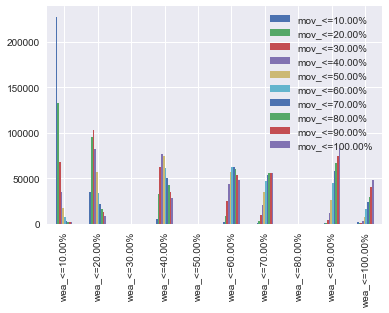

In [154]:
index = ["wea_"+x for x in level_mark]
grouping_df = pd.DataFrame(dict_,index=index,columns=dict_.keys())
grouping_df.plot(kind='bar')

In [156]:
# The number of players who move less than 90% of all but acquire more weapons than 90% of all is 2370. It is reasonbale to assume they are the cheaters. 
df[(df['weaponsAcquired'] >= weapon_upp_bound) & (df['Total Distance'] <= move_low_bound)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 1357 to 4446318
Data columns (total 32 columns):
Id                 2370 non-null object
groupId            2370 non-null object
matchId            2370 non-null object
assists            2370 non-null int64
boosts             2370 non-null int64
damageDealt        2370 non-null float64
DBNOs              2370 non-null int64
headshotKills      2370 non-null int64
heals              2370 non-null int64
killPlace          2370 non-null int64
killPoints         2370 non-null int64
kills              2370 non-null int64
killStreaks        2370 non-null int64
longestKill        2370 non-null float64
matchDuration      2370 non-null int64
matchType          2370 non-null object
maxPlace           2370 non-null int64
numGroups          2370 non-null int64
rankPoints         2370 non-null int64
revives            2370 non-null int64
rideDistance       2370 non-null float64
roadKills          2370 non-null int64
swimDistance       

In [ ]:
df = df.drop(df['kills'] > 40 )
df = df.drop(df['longestKills'] > 1000 )
df = df.drop(df[(df['damageDealt'] >= damage_upp_bound) & (df['Total Distance'] <= move_low_bound)])
df = df.drop(df[(df['weaponsAcquired'] >= weapon_upp_bound) & (df['Total Distance'] <= move_low_bound)].index)

<h1>Complementary

Where is the most popular area for bomb falling. [The Red Zone]

In [237]:
datafile = "kill_match_stats_final_4.csv"
df2 = pd.read_csv(datafile)
#import

In [238]:
# df3 = df2[:1000000]

In [241]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11640855 entries, 0 to 11640854
Data columns (total 12 columns):
killed_by            object
killer_name          object
killer_placement     float64
killer_position_x    float64
killer_position_y    float64
map                  object
match_id             object
time                 int64
victim_name          object
victim_placement     float64
victim_position_x    float64
victim_position_y    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.0+ GB


In [242]:
df2['killed_by'].unique()
#find out the index for killing by the falling bombs, which should be RedZone

array(['M249', 'Kar98k', 'Down and Out', 'SCAR-L', 'Bluezone', 'S686',
       'Grenade', 'Falling', 'P92', 'M416', 'SKS', 'AKM', 'UMP9', 'M16A4',
       'Tommy Gun', 'Mini 14', 'death.WeapSawnoff_C', 'S1897', 'S12K',
       'P1911', 'Drown', 'Mk14', 'Punch', 'Motorbike (SideCar)', 'VSS',
       'Vector', 'Uaz', 'Hit by Car', 'Boat',
       'death.ProjMolotov_DamageField_C', 'Groza', 'Micro UZI', 'R1895',
       'M24', 'Motorbike', 'Machete', 'Crossbow', 'Dacia', 'R45', 'Win94',
       'Sickle', 'DP-28', 'Buggy', 'Crowbar', 'Pan', 'P18C', 'AWM',
       'RedZone', 'death.Buff_FireDOT_C', 'Pickup Truck', 'AUG',
       'Aquarail', 'death.RedZoneBomb_C', 'Van', 'death.ProjMolotov_C',
       'death.PG117_A_01_C'], dtype=object)

In [243]:
df2.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,M249,0932313woaini,7.0,529007.7,440035.5,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,GODusopp,11.0,526111.8,432951.8
1,Kar98k,arunrunrun,6.0,440414.8,285918.1,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,TheOnly_0ne,13.0,438853.4,280981.6
2,Down and Out,Rabbit812,6.0,439923.2,282419.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,NOAIM1,13.0,437034.8,282477.7
3,Down and Out,0932313woaini,7.0,530312.4,440969.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,liweiliwei,11.0,528304.4,439696.8
4,SCAR-L,sa11y1126,3.0,466609.2,409546.3,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1793,PKBskg,5.0,462901.5,403350.5


In [277]:
# df2[df2['killed_by'] =='RedZone']

In [278]:
miramar = df2[df2[ "map"] == "MIRAMAR"]
#analyze miramar map
miramar

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,M249,0932313woaini,7.0,529007.7,440035.5,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,GODusopp,11.0,526111.8,432951.8
1,Kar98k,arunrunrun,6.0,440414.8,285918.1,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,TheOnly_0ne,13.0,438853.4,280981.6
2,Down and Out,Rabbit812,6.0,439923.2,282419.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1096,NOAIM1,13.0,437034.8,282477.7
3,Down and Out,0932313woaini,7.0,530312.4,440969.0,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,liweiliwei,11.0,528304.4,439696.8
4,SCAR-L,sa11y1126,3.0,466609.2,409546.3,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1793,PKBskg,5.0,462901.5,403350.5
5,Bluezone,NaN,NaN,NaN,NaN,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1505,0932313woaini,7.0,495367.2,419491.3
6,Down and Out,AT_maozaomao,7.0,529282.9,437029.2,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1209,zhao-you-zi,11.0,527772.9,437289.5
7,S686,ruokuisama,2.0,434772.1,280943.7,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,180,ysuperc,25.0,435505.9,280925.8
8,Grenade,LinGend,1.0,325518.5,356314.3,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,268,iphoneseven_user,NaN,325673.8,356267.9
9,Falling,NaN,NaN,NaN,NaN,MIRAMAR,2U4GBNA0YmkBbLEF24GGKLLAPoDQjAD8DoJFecsw9jUiNE...,1341,178cm80kg15cm,9.0,516814.6,507303.8


In [279]:
position_data = [ "victim_position_x", "victim_position_y"]

In [281]:
# change the x,y to match the number on the photo
for position in position_data:

    miramar[position] = miramar[position].apply( lambda x: x* 1000/ 800000)

    miramar = miramar[miramar[position] != 0]

In [282]:
miramar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967963 entries, 0 to 11639931
Data columns (total 12 columns):
killed_by            object
killer_name          object
killer_placement     float64
killer_position_x    float64
killer_position_y    float64
map                  object
match_id             object
time                 int64
victim_name          object
victim_placement     float64
victim_position_x    float64
victim_position_y    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 195.2+ MB


In [283]:
mira_sample = miramar[miramar[ "killed_by"] == 'RedZone']
# df2[df2['killed_by'] =='RedZone']
mira_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 7578 to 11639639
Data columns (total 12 columns):
killed_by            2135 non-null object
killer_name          98 non-null object
killer_placement     98 non-null float64
killer_position_x    98 non-null float64
killer_position_y    98 non-null float64
map                  2135 non-null object
match_id             2135 non-null object
time                 2135 non-null int64
victim_name          2135 non-null object
victim_placement     2124 non-null float64
victim_position_x    2135 non-null float64
victim_position_y    2135 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 216.8+ KB


<h1> Complementary Code Summary

In [257]:
# import matplotlib.pyplot as plt # to show the map jpg
# import matplotlib.image as mpimg # mpimg read jpg
# mira_sample

In [294]:
import matplotlib.pyplot as plt # to show the map jpg
import matplotlib.image as mpimg # to read jpg
import matplotlib.cm as cm


/Users/wangzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/wangzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


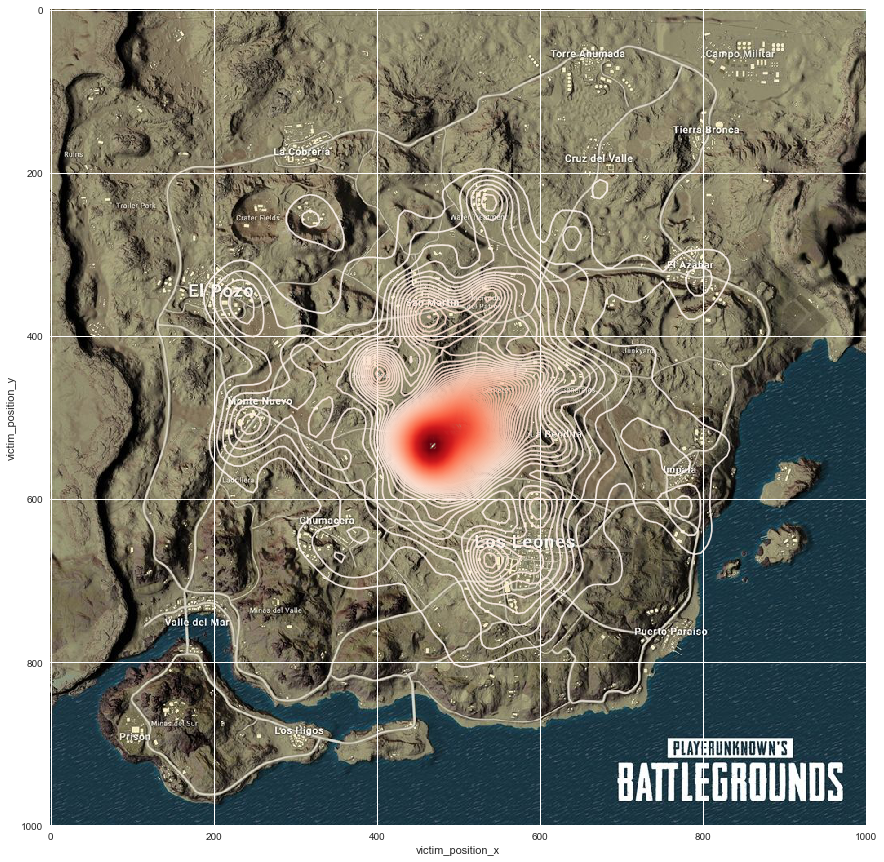

In [287]:
miramar = df2[df2[ "map"] == "MIRAMAR"]

#convert the position to the ratio of the jpg

position_data = [ "victim_position_x", "victim_position_y"]

for position in position_data:

    miramar[position] = miramar[position].apply( lambda x: x* 1000/ 800000)

    miramar = miramar[miramar[position] != 0]



mira_sample = miramar[miramar[ "killed_by"] == 'RedZone']





bg = imread( "miramar.jpg")

fig, ax = plt.subplots( 1, 1,figsize=( 15, 15))

ax.imshow(bg)

sns.kdeplot(mira_sample[ "victim_position_x"], mira_sample[ "victim_position_y"],n_levels= 100, cmap=cm.Reds, alpha= 0.9)



In [290]:
df2['map'].unique()

array(['MIRAMAR', 'ERANGEL', nan], dtype=object)

/Users/wangzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/wangzheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


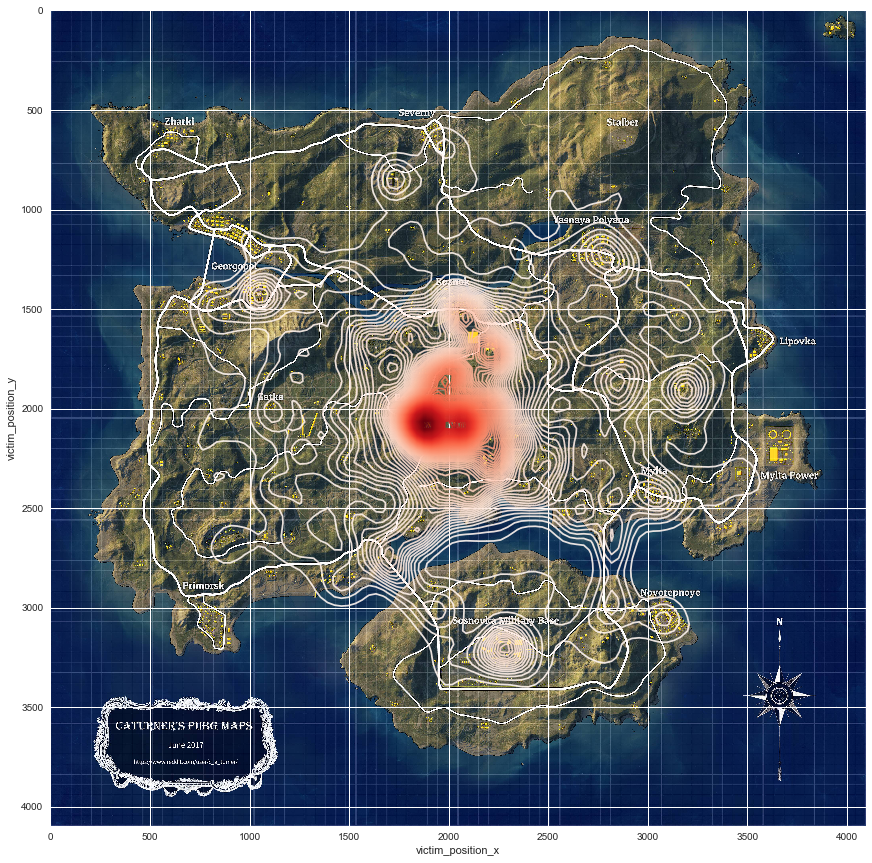

In [293]:
erangel = df2[df2[ "map"] == "ERANGEL"]


position_data = [ "victim_position_x", "victim_position_y"]

for position in position_data:

    erangel[position] = erangel[position].apply( lambda x: x* 4096/ 800000)

    erangel = erangel[erangel[position] != 0]
    

eran_sample = erangel[erangel[ "killed_by"] == 'RedZone']



# erangel heatmap

bg = imread( "erangel.jpg")

fig, ax = plt.subplots( 1, 1,figsize=( 15, 15))

ax.imshow(bg)

sns.kdeplot(eran_sample[ "victim_position_x"], eran_sample[ "victim_position_y"],n_levels= 100, cmap=cm.Reds, alpha= 0.9)